Problem 1

Open true_labels_pred_probs.csv (same file you used in HW4). 

Calculate the points on the ROC curve. (2 points)

Plot the ROC curve. (1 points)

Print what is the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. (5 points)

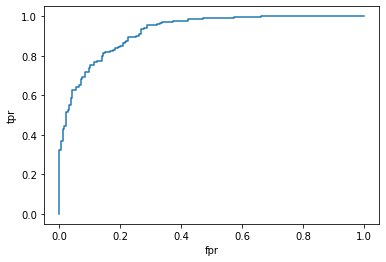

0.5967301685054103


In [7]:
import pandas as pd
from sklearn.metrics import roc_curve
from matplotlib.pylab import plt
import numpy as np

df = pd.read_csv('data/true_labels_pred_probs.csv')

# 1 point for using the class 1 predicted probabilities
# 1 point for correctly calculating the fpr and tpr points (roc_curve is one option, they can also manually calculate the points)
fpr, tpr, p_crits = roc_curve(df['y_true'],df['pred_prob_class1']) 

# 1 point if plot is correct and the x and y labels are there
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

# distance calculation
distance = np.zeros(len(fpr))
for i in range(len(fpr)):
    distance[i] = np.sqrt( (fpr[i])**2 + (tpr[i] - 1)**2 ) # 3 points for the correct distances
    
print(p_crits[np.argmin(distance)]) # 2 points for correctly determining the best p_crit


Problem 2:

In class we have seen both l1 (Lasso) and l2 (Ridge) regression. These are two basic ways to perform regularization. In the following problem, we will explore the **elastic net**, a third regularization technique that combines both l1 and l2 penalties. We will use this in a classification context. 

The basic idea of the elastic net is that the cost function in regression becomes

$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha \rho}{m} \sum_{j=0}^{m}|\theta_j|} + \color{blue}{ \frac{\alpha (1-\rho)}{m} \sum_{j=0}^{m} \theta_j^2}$,

and the cost function in classification is

$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{ \frac{\alpha \rho}{m} \sum_{j=0}^{m}|\theta_j|} + \color{blue}{ \frac{\alpha (1-\rho)}{m} \sum_{j=0}^{m} \theta_j^2}$,


where $\alpha$ is the regularization parameter and $\rho$ is the l1 ratio (how much weight we assign to the l1 term over the l2 term in the cost function). Basically, an elastic net uses the weighted sum of the l1 and l2 regularization terms. The weight of the l1 term is $\rho$ and the weight of the l2 term is $(1-\rho)$ where $\rho$ is between 0 and 1.

You can read more about the elastic net [here](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net).

Problem 2a 

Load the training and test sets from train.csv and test.csv. (1 point)

Run a logistic regression model without regularization on the data and print the accuracy score of the test set. Use the 'saga' solver. (2 points)

In [2]:
# from sklearn.datasets import make_classification, make_moons

# X, y = make_classification(n_samples = 1000,n_features=10, n_redundant=2, n_informative=3,
#                            random_state=0, n_clusters_per_class=2)

# df = pd.DataFrame(data=X_train,columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
# df['y'] = y_train
# df.to_csv('data/train.csv',index=False)

# df = pd.DataFrame(data=X_test,columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
# df['y'] = y_test
# df.to_csv('data/test.csv',index=False)

# print(np.shape(X))

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('data/train.csv')
y_train = df_train['y'].values
df_train.drop(columns=['y'],inplace=True)
X_train = df_train.values

df_test = pd.read_csv('data/test.csv')
y_test = df_test['y'].values
df_test.drop(columns=['y'],inplace=True)
X_test = df_test.values


print(np.shape(X_train))

lr = LogisticRegression(penalty='none',solver='saga',max_iter=1e4)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))


(750, 10)
0.708


Problem 2b

Perform l1 regularization on the data. 

The value of the alpha should contain 21 uniformly spaced values in log from 1e-2 to 1e2. (1 point)

Again, use the 'saga' solver and if you see a converge warning, fix it without ignoring the warning. (2 points)

Plot the train and test accuracy scores. (2 points)

Print the best test accuracy score and the corresponding alpha value. (2 points)


0.724
[ 3.98107171  6.30957344 15.84893192 25.11886432]


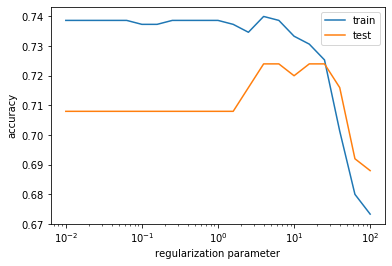

In [4]:
alpha = np.logspace(-2,2,21)  # 1 point

train_acc = np.zeros(len(alpha)) 
test_acc = np.zeros(len(alpha))

# 2 points
for i in range(len(alpha)):
    lr = LogisticRegression(penalty='l1',C = 1/alpha[i],solver='saga',max_iter=1e4) 
    lr.fit(X_train,y_train)

    train_acc[i] = accuracy_score(y_train,lr.predict(X_train))
    test_acc[i] = accuracy_score(y_test,lr.predict(X_test))

print(np.max(test_acc)) # 1 point
print(alpha[test_acc == np.max(test_acc)]) # 1 point

# 2 points
plt.plot(alpha,train_acc,label='train')
plt.plot(alpha,test_acc,label='test')
plt.xlabel('regularization parameter')
plt.ylabel('accuracy')
plt.legend()
plt.semilogx()
plt.show()


Problem 2c 

Perform l2 regularization on the data. The alpha values and all the other instructions are the same as in 2b. (1 point)

0.72
[25.11886432 63.09573445]


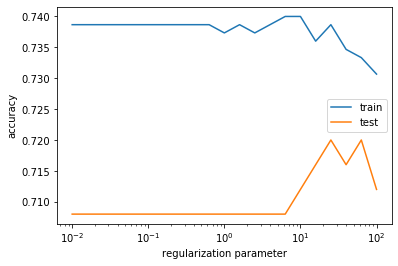

In [5]:

train_acc = np.zeros(len(alpha)) 
test_acc = np.zeros(len(alpha))

for i in range(len(alpha)):
    lr = LogisticRegression(penalty='l2',C = 1/alpha[i],solver='saga',max_iter=1e4) # 1 point
    lr.fit(X_train,y_train)

    train_acc[i] = accuracy_score(y_train,lr.predict(X_train))
    test_acc[i] = accuracy_score(y_test,lr.predict(X_test))

print(np.max(test_acc))
print(alpha[test_acc == np.max(test_acc)])

plt.plot(alpha,train_acc,label='train')
plt.plot(alpha,test_acc,label='test')
plt.xlabel('regularization parameter')
plt.ylabel('accuracy')
plt.legend()
plt.semilogx()
plt.show()



Problem 2d

Let's train an elastic net now. The elastic net has two parameters: alpha and rho (the l1 ratio). The l1 ratio should be linearly spaced between 0 and 1 with 26 values in between. (1 point) Use the 'saga' solver. The reason we use the saga solver everywhere in Problem 2 is that it is the only solver in LogisticRegression that works with an elastic net. 

Calculate the train and test accuracy scores for all combinations of alpha and rho. (4 points)

Print the best test score and the corresponding alpha and rho values. (3 points)

Prepare heatmaps to show the train and test scores. Make sure that the data range covered by the two heatmaps are the same so you can easily compare the two heatmaps and you can identify the high bias and high variance regions. Label the plot and add a colorbar. Make the x and y ticks look pretty. (3 points)

Which of the four approaches gave you the best test score?

0.732
39.810717055349734 0.36


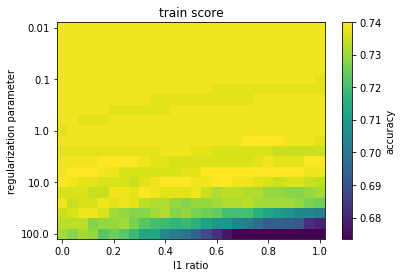

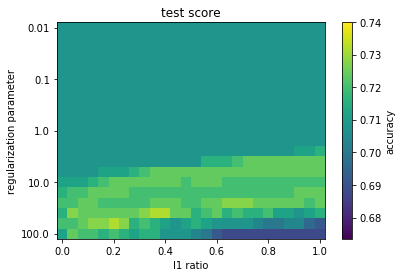

In [6]:
rho = np.linspace(0,1,26) # 1 point

# 4 points
train_acc = np.zeros([len(alpha),len(rho)]) 
test_acc = np.zeros([len(alpha),len(rho)])
for i in range(len(alpha)):
    for j in range(len(rho)):
        lr = LogisticRegression(penalty='elasticnet',C = 1/alpha[i],solver='saga',l1_ratio=rho[j],max_iter=1e4)
        lr.fit(X_train,y_train)
        train_acc[i,j] = accuracy_score(y_train,lr.predict(X_train))
        test_acc[i,j] = accuracy_score(y_test,lr.predict(X_test))

print(np.max(test_acc)) # 1 point
indcs = np.unravel_index(np.argmax(test_acc),np.shape(test_acc))
print(alpha[indcs[0]],rho[indcs[1]]) # 2 points

# 5 points
plt.imshow(train_acc,vmin=np.min([np.min(train_acc),np.min(test_acc)]),vmax=np.max([np.max(train_acc),np.max(test_acc)]))
plt.xticks(np.arange(len(rho))[::5],rho[::5])
plt.yticks(np.arange(len(alpha))[::5],alpha[::5])
plt.xlabel('l1 ratio')
plt.ylabel('regularization parameter')
plt.title('train score')
plt.colorbar(label='accuracy')
plt.show()

# 1 point
plt.imshow(test_acc,vmin=np.min([np.min(train_acc),np.min(test_acc)]),vmax=np.max([np.max(train_acc),np.max(test_acc)]))
plt.xticks(np.arange(len(rho))[::5],rho[::5])
plt.yticks(np.arange(len(alpha))[::5],alpha[::5])
plt.xlabel('l1 ratio')
plt.ylabel('regularization parameter')
plt.title('test score')
plt.colorbar(label='accuracy')
plt.show()
